# Exoplanet Data Analysis Practice

This notebook is for practicing data analysis with a moderately sized dataset with many attributes.


## Imports
The imports utilized for the data analysis

In [48]:
from matplotlib import pyplot as plt
from pandas import DataFrame, read_csv, concat

## Importing the Dataset

Defines the path to the file of the dataset.

In [49]:
exoplanet_data: str = 'exoplanet_dataset/PS_2024.01.30_14.51.36.csv'

## Generating Key Map of Attributes

Creating a function to create a key map of the exoplanet attributes.

In [50]:
def generate_attribute_map(data_file: str) -> dict[str, str]:
    map: dict[str, str] = {}

    with open(data_file, 'r') as f:
        lines: list[str] = f.readlines()

    f.close()

    lines = lines[3:]

    while lines[0].startswith('# COLUMN'):
        line: str = lines.pop(0)[9:]
        key, data = line.split(': ')
        map[key] = data.strip()

    return map

Creating the attribute map using the generate_attribute_map() function.

In [51]:
attribute_map: dict[str, str] = generate_attribute_map(exoplanet_data)

## Functions for Descriptive Statistics

Functions that show measures of central tendency, spread, and to make a scatter plot.

In [52]:
def get_central_tendencies(data_frame: DataFrame, column_name: str) -> dict[str, float]:
    return {'mean': data_frame[column_name].mean(),
            'median': data_frame[column_name].median(),
            'mode': data_frame[column_name].mode()}

def get_spread(data_frame: DataFrame, column_name: str) -> dict[str, float]:
    return {'variance': data_frame[column_name].var(),
            'standard_deviation': data_frame[column_name].std(),
            'inter_quartile_range': data_frame[column_name].quantile(0.75) - data_frame[column_name].quantile(0.25),
            'range': data_frame[column_name].max() - data_frame[column_name].min()}

def generate_scatter_plot(data_frame: DataFrame, attribute_x: str, attribute_y: str) -> None:
    title: str = f'{attribute_map[attribute_x]} vs. {attribute_map[attribute_y]}'
    data_frame.plot(kind='scatter', x=attribute_x, y=attribute_y, title=title, color='#bee5b0')
    plt.xlabel(attribute_map[attribute_x])
    plt.ylabel(attribute_map[attribute_y])
    plt.show()

## Creating the Dataframe of the Exoplanets

In [60]:
pl_skip_row: list[int] = [0 + i for i in range(0, 290)]

pl_df: DataFrame = read_csv(exoplanet_data, skiprows = pl_skip_row, low_memory = False)

pl_df

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2011-08,2014-07-23,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35195,35196,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,0,2,...,NaN,2014-08-21,2004-01,2014-08-21,5,1,10,1,0,0
35196,35197,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,1,1,...,NaN,2022-01-10,2021-12,2022-01-10,0,0,0,0,0,0
35197,35198,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,0,1,...,NaN,2014-07-23,2011-08,2014-07-23,1,1,1,0,0,0
35198,35199,xi Aql b,xi Aql,b,HD 188310,HIP 97938,TIC 375464367,Gaia DR2 4298361114750843904,0,1,...,NaN,2014-05-14,2008-06,2014-05-14,1,1,1,0,0,0


In [61]:
pl_df_numeric: DataFrame = pl_df.select_dtypes(include=['float64', 'int64'])
identifier_columns: DataFrame = pl_df[['rowid', 'pl_name', 'hostname', 'pl_letter']]

pl_df_numeric = pl_df_numeric.drop(['rowid'], axis=1)
pl_df_numeric = concat([identifier_columns, pl_df_numeric], axis = 1)

pl_df_numeric

,rowid,pl_name,hostname,pl_letter,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,...,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,0,2,1,0,0,2007,...,-0.0071,NaN,NaN,NaN,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,0,2,1,0,0,2007,...,-0.0071,NaN,NaN,NaN,2,1,2,0,0,0
2,3,11 Com b,11 Com,b,1,2,1,0,0,2007,...,-0.0071,NaN,NaN,NaN,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,1,1,1,0,0,2009,...,-0.0075,NaN,NaN,NaN,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,0,1,1,0,0,2009,...,-0.0075,NaN,NaN,NaN,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35195,35196,ups And d,ups And,d,0,2,3,0,0,1999,...,-2.1920,NaN,NaN,NaN,5,1,10,1,0,0
35196,35197,ups Leo b,ups Leo,b,1,1,1,0,0,2021,...,-2.0505,NaN,NaN,NaN,0,0,0,0,0,0
35197,35198,xi Aql b,xi Aql,b,0,1,1,0,0,2007,...,-0.0072,NaN,NaN,NaN,1,1,1,0,0,0
35198,35199,xi Aql b,xi Aql,b,0,1,1,0,0,2007,...,-0.0072,NaN,NaN,NaN,1,1,1,0,0,0


In [62]:
pl_rade_central_tendencies_map: dict[str, float] = get_central_tendencies(pl_df, 'pl_rade')
pl_radj_central_tendencies_map: dict[str, float] = get_central_tendencies(pl_df, 'pl_radj')

print(f'Average of {attribute_map['pl_rade']}: {pl_rade_central_tendencies_map['mean']:.4f}')
print(f'Average of {attribute_map['pl_radj']}: {pl_radj_central_tendencies_map['mean']:.4f}')


Average of Planet Radius [Earth Radius]: 5.3068
Average of Planet Radius [Jupiter Radius]: 0.4362


<h1>Plot</h1>

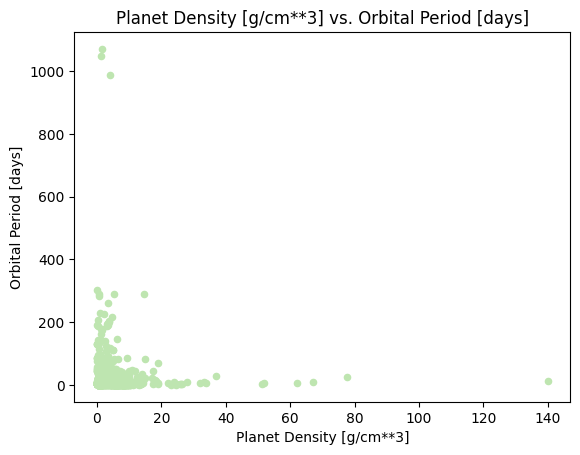

In [56]:
attribute_x: str = 'pl_dens'
attribute_y: str = 'pl_orbper'

generate_scatter_plot(pl_df, attribute_x, attribute_y)